In [3]:
%pip install mysql-connector-python geopandas pyarrow matplotlib python-dotenv

  Using cached geopandas-1.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pyogrio-0.11.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (5.3 kB)
  Using cached pyproj-3.7.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached shapely-2.1.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached 

In [4]:
# Setup and Imports

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mysql.connector
from dotenv import load_dotenv
import os

MYSQL_USER = 'martina'
MYSQL_PASSWORD = 'martina'
MYSQL_HOST = 'localhost'   # or the IP if your MySQL is remote
MYSQL_DATABASE = 'nyc_taxi'
MYSQL_PORT = '3306'

MYSQL_CONFIG = {
    'user': MYSQL_USER,
    'password': MYSQL_PASSWORD,
    'host': MYSQL_HOST,
    'database': MYSQL_DATABASE,
    'port': int(MYSQL_PORT)
}

In [6]:
# Load Taxi Zone shapefile (.shp)

shapefile_path = '../taxi_zones/taxi_zones.shp'

zones = gpd.read_file(shapefile_path)

# Show first rows
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [26]:
# Connect to MySQL and query top pickup zones

cnx = mysql.connector.connect(**MYSQL_CONFIG)
cursor = cnx.cursor()

# SQL query: Top 50 pulocationid
query = """
SELECT pu_location_id, COUNT(*) AS pickups
FROM yellow_taxi_trips
GROUP BY pu_location_id
ORDER BY pickups DESC
LIMIT 50;
"""

cursor.execute(query)
results = cursor.fetchall()

# Create DataFrame from results
pickup_df = pd.DataFrame(results, columns=['LocationID', 'pickups'])

# Close connection
cursor.close()
cnx.close()

# Show the DataFrame
pickup_df


,LocationID,pickups
0,132,1664345
1,161,1582873
2,237,1552158
3,236,1407171
4,162,1169813
5,230,1140915
6,186,1111200
7,138,1074503
8,142,1067614
9,170,978002


,LocationID,zone,borough,pickups
0,13,Battery Park City,Manhattan,213067
1,43,Central Park,Manhattan,528779
2,48,Clinton East,Manhattan,854902
3,50,Clinton West,Manhattan,212039
4,68,East Chelsea,Manhattan,921241
5,70,East Elmhurst,Queens,134371
6,75,East Harlem South,Manhattan,218537
7,79,East Village,Manhattan,784411
8,87,Financial District North,Manhattan,195699
9,88,Financial District South,Manhattan,104969


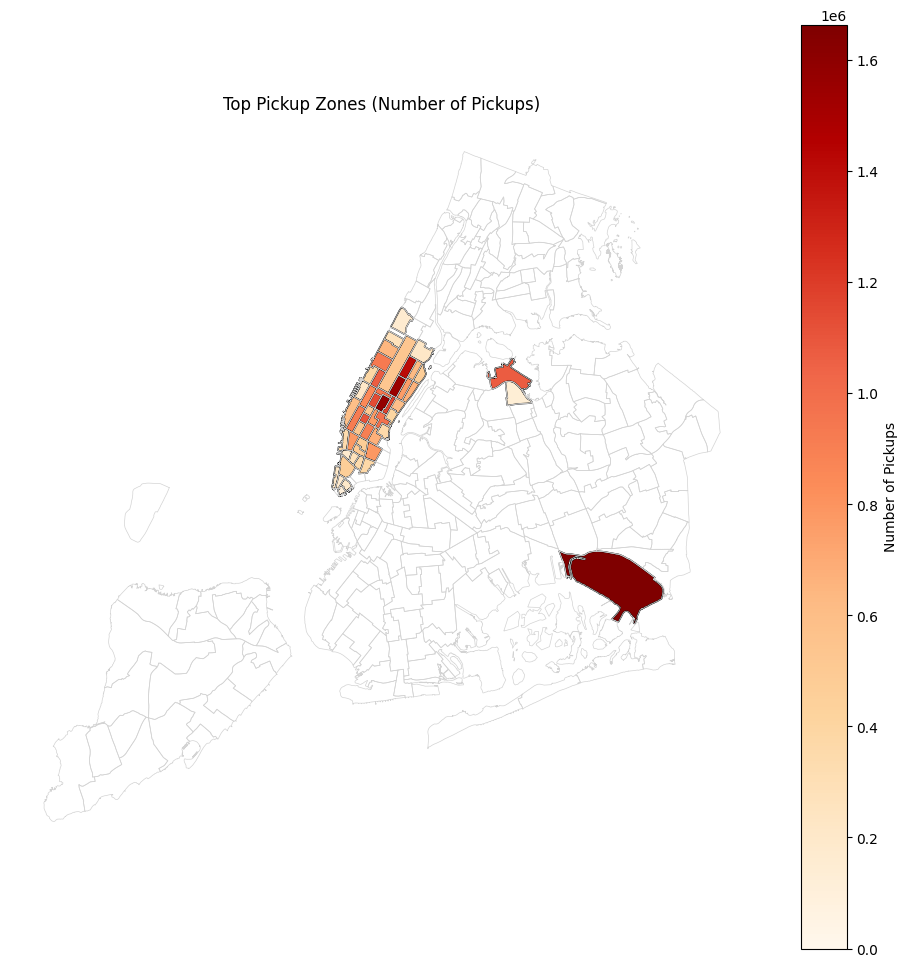

In [29]:
results = pd.DataFrame(zones_pickup, columns=['LocationID', 'zone', 'borough', 'pickups'])

# Join pickup data with zones GeoDataFrame
zones_pickup = zones.merge(pickup_df, how='inner', on='LocationID')

# Sort for legend display
zones_pickup_sorted = zones_pickup.sort_values(by='pickups', ascending=False)

# Plot map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot all zones
zones.boundary.plot(ax=ax, linewidth=0.5, color='lightgray')

# Plot top pickup zones
zones_pickup.plot(
    column='pickups',
    ax=ax,
    legend=True,
    cmap='OrRd',
    edgecolor='black',
    vmin=0,
    legend_kwds={'label': "Number of Pickups", 'orientation': "vertical"}
)

plt.title('Top Pickup Zones (Number of Pickups)')
plt.axis('off')
'''
# Build legend labels
legend_labels = [
    f"{row['zone']} ({row['pickups']:,} pickups)"
    for idx, row in zones_pickup_sorted.iterrows()
]

# Display the legend below the map
plt.figtext(
    0.5, -0.05, '\n'.join(legend_labels),
    wrap=True,
    horizontalalignment='center',
    fontsize=10
)
'''
results